**Building a simple Feed forward network**

This network learns from the MNIST dataset

First we import TensorFlow and run the version

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

**Load the dataset**

MNIST is the go-to data set you can start exploring neural nets with. is a large database of handwritten digits that is commonly used for training various image processing systems. 

The idea is to feed through the pixel values of the image and have the neural network output thr probability of what it thinks[link text](https://)

In [0]:
mnist = tf.keras.datasets.mnist # 28x28 of hand written digits 0-9

**Unpack into training and testing set**

In [5]:
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Let's visualize and see what is in the data**

This the actual data that we are going to parse in through the network and expect it to learn from.

In [9]:
print(x_train[0]) #print the array

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Visualize in plt.imshow**


It actually shows the number


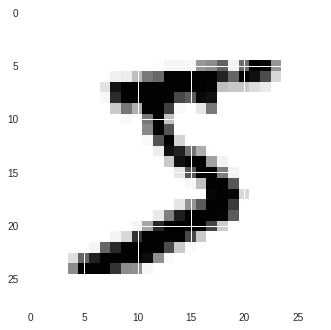

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

**We need to normalize our data**

This will our pixel values between 0 to 1. Just so that it is easy for our network to learn

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


**Let's see how it changes the data**



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

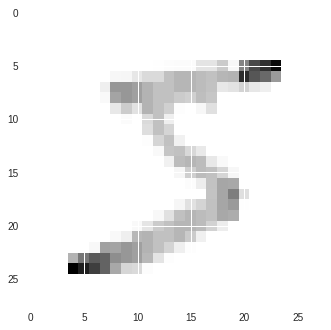

In [16]:
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

**Now we build the model**



In [0]:
model = tf.keras.models.Sequential() # feed forward
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape)) # the input layer should be flattened, to flatten the 28x28 images, eg np.reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # we add 1st hidden dense layer, 128 unit/neurons with relu as activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # we add 2nd hidden dense layer, 128 unit/neurons
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # finally we have dense layer as final layer, 10 unit/neurons becasue we have 10 classes with softmax as activation

# Thats all about the model

**Then we define some parameters for the traininng of the model**

optimzer: Algorithm that minimizes loss

loss: Degree of error

metrics: Evaluating the model performance

In [0]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Now we train the model**

In [27]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 147us/step - loss: 0.2673 - acc: 0.9208
Epoch 2/3
60000/60000 [==============================] - 9s 156us/step - loss: 0.1095 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 8s 137us/step - loss: 0.0744 - acc: 0.9764


**it's a good practice the evaluate the model**

In [28]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 37us/step
0.1005307425823994 0.9697


**We can the model**

In [0]:
model.save('mnist_model.model')

**We can also load the model any time**

In [0]:
new_model = tf.keras.models.load_model("mnist_model.model")
predictions = new_model.predict([x_test])
print(predictions)

**Get the data into a numpy array**

In [37]:
import numpy as np
print(np.argmax(predictions[0]))  #print the value in 0th element of x_test

7


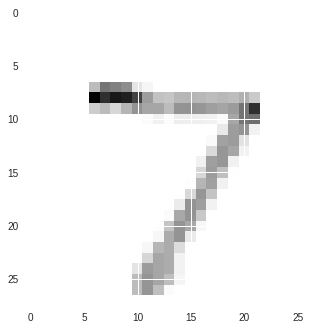

In [36]:
plt.imshow(x_test[0])